In [0]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("All.csv")

In [0]:
df = dataset

df = df.drop(['T_db_10', 'V_a_10'], axis=1)

dataset = df

In [0]:
## Dropping highly correlated features

df = dataset


# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.to_csv("classifierCorrelation.csv", index=False)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(corr_matrix)
if 'Temperature' in to_drop:
  to_drop.remove('Temperature')

# Drop features 
df = df.drop(df[to_drop], axis=1)


print("Highly correlated variables being dropped: ", to_drop)

dataset = df


                   Activity       Clo  ...   New_MET  NewMET_PMV
Activity           1.000000  0.030575  ...  0.018809    0.084640
Clo                0.030575  1.000000  ...  0.145862    0.621318
General Sensation  0.028736  0.145094  ...  0.008342    0.204366
HR                 0.065153  0.081387  ...  0.564924    0.112624
MRT                0.052538  0.129011  ...  0.335527    0.585837
Pressure           0.002120  0.119960  ...  0.109405    0.248909
RH                 0.044472  0.025670  ...  0.151394    0.029747
T_db_110           0.076685  0.038841  ...  0.349381    0.674372
T_db_50            0.029966  0.083991  ...  0.289629    0.595772
Temp               0.064354  0.092446  ...  0.308278    0.666370
Temp.1             0.063835  0.060318  ...  0.300758    0.694954
Temperature        0.088278  0.098877  ...  0.308943    0.663962
V_a_110            0.058495  0.021178  ...  0.128851    0.115959
V_a_50             0.025291  0.038097  ...  0.022764    0.278144
PMV                0.3609

In [0]:
# Encoding Gender
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset['Gender'] = lb_make.fit_transform(dataset['Gender'])

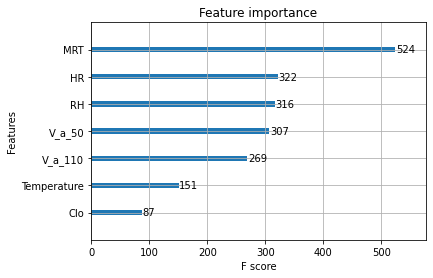

In [0]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data

# split data into X and y
X = dataset[['Activity', 'Clo',  'Gender',
        'HR',  'MRT',  'RH', 
       'V_a_110', 'V_a_50','Temperature']]
y = dataset[ 'General Sensation']
# fit model to training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model, importance_type="weight")

pyplot.savefig("all_FI.png")
# pyplot.show()

In [0]:
import matplotlib

# matplotlib.rcParams['text.usetex'] = True

In [0]:
gs = dataset['General Sensation']

temp = dataset.pop('General Sensation')
dataset['General Sensation'] = gs

In [0]:
import xgboost
from matplotlib.pyplot import figure
import graphviz as gv
import pylab

AllPersons = dataset['Subject'].unique()

for UniquePerson in AllPersons:
  split_dataset = dataset.loc[dataset['Subject'] == UniquePerson]
  # split data into X and y
  X = split_dataset[['Activity', 'Clo',  'Gender',
          'HR',  'MRT',  'RH', 
        'V_a_110', 'V_a_50','Temperature']]
  y = split_dataset[ 'General Sensation']
  # fit model to training data
  model = XGBClassifier()
  model.fit(X, y)
  # plot feature importance
  pyplot.figure(figsize=(16,9))
  plot_importance(model, importance_type="weight")
  Title = "Feature Importance for " + UniquePerson
  pyplot.title(Title)



  filename = UniquePerson + "_FI.png"
  pyplot.savefig(filename, bbox_inches="tight")

  # pyplot.figure(figsize=(4,3))
  
  xgboost.plot_tree(model,num_trees=1)
  # fig = matplotlib.pyplot.gcf()
  # fig.set_size_inches(16, 9)
  Title = "Tree structure for " + UniquePerson + ", Tree number: 2"
  pyplot.title(Title)
  filename = UniquePerson + "_Tree.png"
  # pyplot.figure(figsize=(16,9))
  pyplot.savefig(filename, bbox_inches="tight")

  graphviz_object = xgboost.to_graphviz(model,num_trees=1)
  filename = graphviz_object.render(filename=UniquePerson)

  # pyplot.show()

# AllPersons

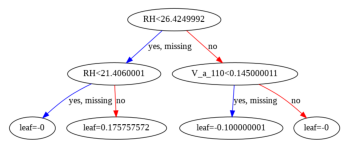

In [0]:
# Ploy how the decision tree was created

import xgboost

# xgb.plot.tree(model = bst)
xgboost.plot_tree(model)
pyplot.show()